In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [11]:
train_34 = pd.read_csv('f:\\Master in singapore\\Machine learning\\project\\Final\\submit\\Step2_Model_Training_&_Optimization\\full_hdb_perSqm_train_f34.csv')
train_34 = train_34.drop(['Unnamed: 0'], axis = 1)
train_34.describe()

,lat,minPrimary_transitTime,min_dis,remaining_lease,resale_price_per_sqm
count,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000
mean,1.370684,767.537687,0.006234,74.108760,6054.570780
std,0.044107,325.061452,0.003999,15.111595,1387.968535
min,1.270380,62.000000,0.000020,42.333333,3403.508772
25%,1.338580,533.500000,0.003118,61.083333,5136.363636
50%,1.369813,739.000000,0.005477,73.833333,5682.016260
75%,1.401372,959.000000,0.008315,90.833333,6548.672566
max,1.457071,2375.000000,0.019254,97.416667,14829.138298


In [12]:
test_34 = pd.read_csv('f:\\Master in singapore\\Machine learning\\project\\Final\\submit\\Step2_Model_Training_&_Optimization\\full_hdb_perSqm_test_f34.csv')
test_34 = test_34.drop(['Unnamed: 0'], axis = 1)
test_34.describe()

,lat,minPrimary_transitTime,min_dis,remaining_lease,resale_price_per_sqm
count,5919.000000,5919.000000,5919.000000,5919.000000,5919.000000
mean,1.370554,767.195303,0.006282,74.071028,6046.201484
std,0.043836,326.093438,0.003983,15.056405,1361.186094
min,1.270919,62.000000,0.000020,42.333333,3516.483516
25%,1.338440,531.000000,0.003203,61.083333,5141.909500
50%,1.369289,743.000000,0.005560,73.583333,5677.419355
75%,1.401022,959.500000,0.008295,90.916667,6558.849172
max,1.457071,2375.000000,0.019123,95.250000,15000.000000


In [13]:
train_16 = pd.read_csv('f:\\Master in singapore\\Machine learning\\project\\Final\\submit\\Step2_Model_Training_&_Optimization\\full_hdb_perSqm_train_f16.csv')
train_16 = train_16.drop(['Unnamed: 0'], axis = 1)
train_16.describe()

,lat,remaining_lease,resale_price_per_sqm
count,13811.000000,13811.000000,13811.000000
mean,1.370684,74.108760,6054.570780
std,0.044107,15.111595,1387.968535
min,1.270380,42.333333,3403.508772
25%,1.338580,61.083333,5136.363636
50%,1.369813,73.833333,5682.016260
75%,1.401372,90.833333,6548.672566
max,1.457071,97.416667,14829.138298


In [14]:
test_16 = pd.read_csv('f:\\Master in singapore\\Machine learning\\project\\Final\\submit\\Step2_Model_Training_&_Optimization\\full_hdb_perSqm_test_f16.csv')
test_16 = test_16.drop(['Unnamed: 0'], axis = 1)
test_16.describe()

,lat,remaining_lease,resale_price_per_sqm
count,5919.000000,5919.000000,5919.000000
mean,1.370554,74.071028,6046.201484
std,0.043836,15.056405,1361.186094
min,1.270919,42.333333,3516.483516
25%,1.338440,61.083333,5141.909500
50%,1.369289,73.583333,5677.419355
75%,1.401022,90.916667,6558.849172
max,1.457071,95.250000,15000.000000


In [15]:
trainY = train_34['resale_price_per_sqm'] 
trainX = train_34.drop(['resale_price_per_sqm'], axis = 1)

testY = test_34['resale_price_per_sqm']
testX = test_34.drop(['resale_price_per_sqm'], axis = 1) 

model = LinearRegression().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 

print(mae) 

trainY = train_16['resale_price_per_sqm'] 
trainX = train_16.drop(['resale_price_per_sqm'], axis = 1)

testY = test_16['resale_price_per_sqm']
testX = test_16.drop(['resale_price_per_sqm'], axis = 1) 

model = LinearRegression().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 

print(mae) 

506.4963999637789
618.4197777158918


According to code results above, we choose to use the set containing 34 features.

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'minPrimary_transitTime'}>],
       [<Axes: title={'center': 'min_dis'}>,
        <Axes: title={'center': 'remaining_lease'}>],
       [<Axes: title={'center': 'resale_price_per_sqm'}>, <Axes: >]],
      dtype=object)

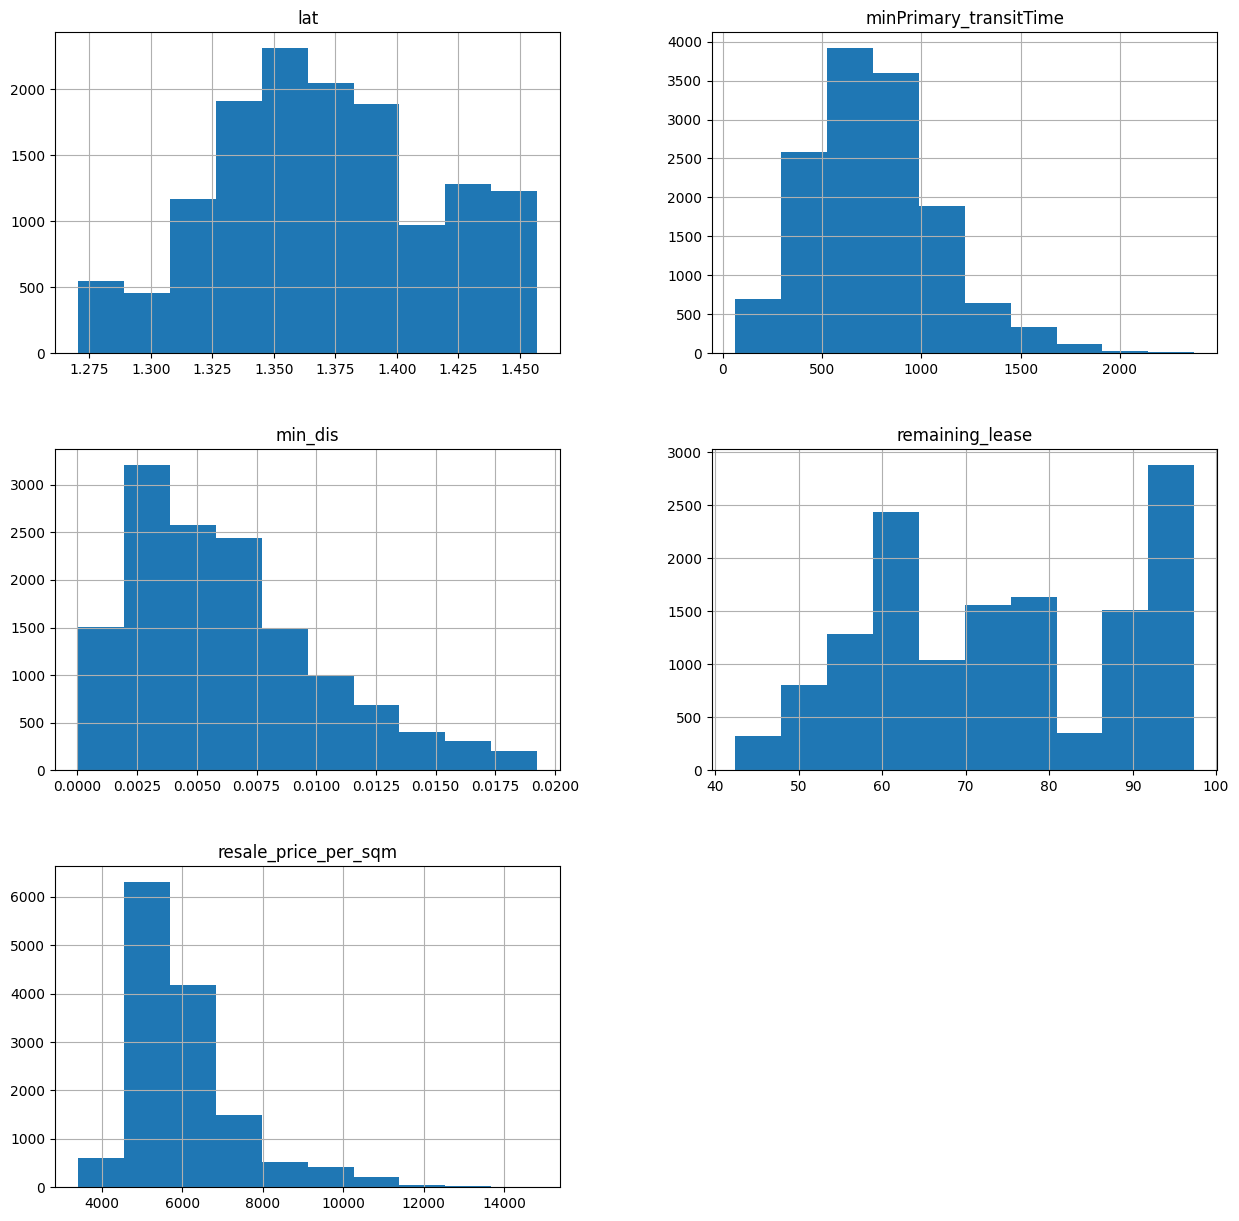

In [16]:
train_34.hist(figsize = (15, 15))

In [17]:
train_34['minPrimary_transitTime'] = np.log(train_34['minPrimary_transitTime']+1)
train_34['min_dis'] = np.log(train_34['min_dis']+1)

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'minPrimary_transitTime'}>],
       [<Axes: title={'center': 'min_dis'}>,
        <Axes: title={'center': 'remaining_lease'}>],
       [<Axes: title={'center': 'resale_price_per_sqm'}>, <Axes: >]],
      dtype=object)

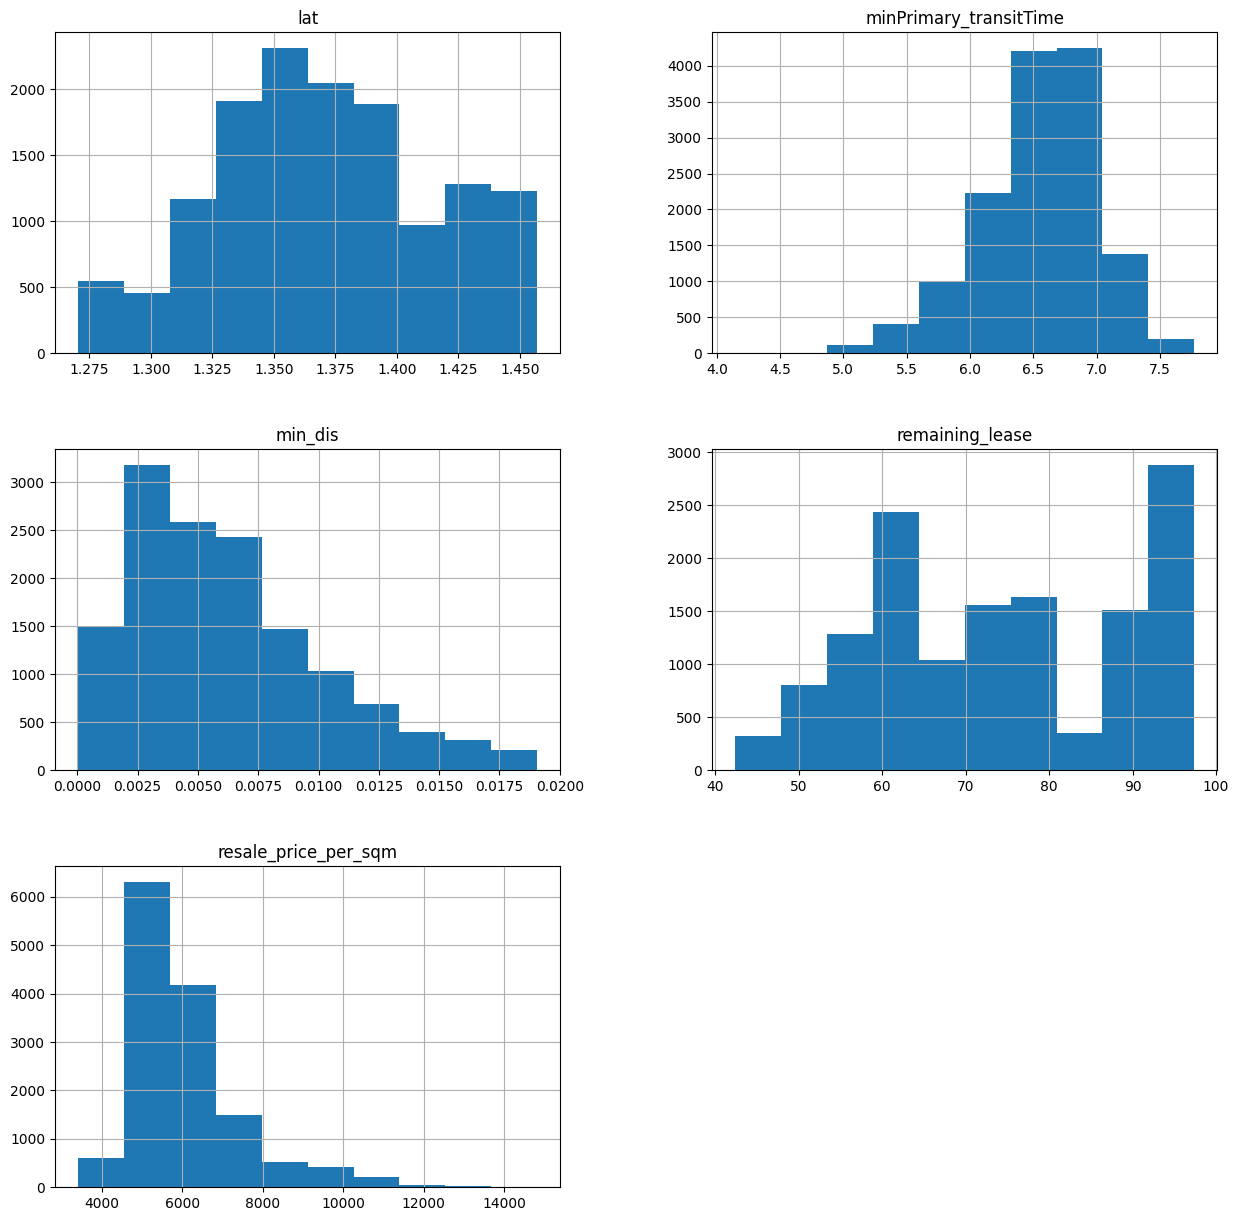

In [18]:
train_34.hist(figsize = (15, 15))

In [19]:
test_34['minPrimary_transitTime'] = np.log(test_34['minPrimary_transitTime']+1)
test_34['min_dis'] = np.log(test_34['min_dis']+1)

In [21]:
train = train_34.drop(columns='resale_price_per_sqm') 
test = test_34.drop(columns='resale_price_per_sqm') 

trainY = train_34['resale_price_per_sqm'].values
testY = test_34['resale_price_per_sqm'].values

train = StandardScaler().fit_transform(train) 
test = StandardScaler().fit_transform(test) 

trainX = train[:,:-1]
testX = test[:,:-1] 

model = LinearRegression().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('LinearRegression MAE:',mae) 

model = Lasso().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('Lasso MAE:',mae) 

model = DecisionTreeRegressor().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('DecisionTreeRegressor MAE:',mae) 

model = RandomForestRegressor().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('RandomForestRegressor MAE:',mae) 

model = GradientBoostingRegressor().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('GradientBoostingRegressor MAE:',mae) 

LinearRegression MAE: 514.1753402436414
Lasso MAE: 514.0969566982284
DecisionTreeRegressor MAE: 382.27046262780743
RandomForestRegressor MAE: 287.2594349371815
GradientBoostingRegressor MAE: 385.65302482444173


In [22]:
trainX = train_34.drop(columns='resale_price_per_sqm') 
testX = test_34.drop(columns='resale_price_per_sqm') 

trainY = train_34['resale_price_per_sqm'] 
testY = test_34['resale_price_per_sqm']
 
model = LinearRegression().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('LinearRegression MAE:',mae) 

model = Lasso().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('Lasso MAE:',mae) 

model = DecisionTreeRegressor().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('DecisionTreeRegressor MAE:',mae) 

model = RandomForestRegressor().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('RandomForestRegressor MAE:',mae) 

model = GradientBoostingRegressor().fit(trainX, trainY) 
predY = model.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print('GradientBoostingRegressor MAE:',mae) 

LinearRegression MAE: 507.5417905242254
Lasso MAE: 510.21911708763
DecisionTreeRegressor MAE: 373.08885256921974
RandomForestRegressor MAE: 283.40265295095446
GradientBoostingRegressor MAE: 385.6181915385446


It seems that models perform not better but a little worse after standardlization.  
So we use data sets without its process next.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor 
from sklearn.metrics import mean_absolute_error

trainX = train_34.drop(columns='resale_price_per_sqm') 
testX = test_34.drop(columns='resale_price_per_sqm') 

trainY = train_34['resale_price_per_sqm'] 
testY = test_34['resale_price_per_sqm']

bagging = BaggingRegressor()
param_grid = {
    "n_estimators":[285],
    "max_features":[28],
    'random_state': [817],
    'oob_score': [True]
}

grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(trainX, trainY)  

best_estimator = grid_search.best_estimator_

# print("Best parameters set:", best_estimator.get_params())

best_estimator.fit(trainX,trainY) 
predY = best_estimator.predict(testX) 
mae = mean_absolute_error(testY, predY) 
print(mae)


271.626531829243


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error

trainX = train_34.drop(columns='resale_price_per_sqm') 
testX = test_34.drop(columns='resale_price_per_sqm') 

trainY = train_34['resale_price_per_sqm'] 
testY = test_34['resale_price_per_sqm']

tree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [15],  
    'min_samples_split': [17], 
    'min_samples_leaf': [2],
    'ccp_alpha':[0.1],
    'random_state':[817]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(trainX, trainY)  

best_estimator = grid_search.best_estimator_

# print("Best parameters set:", best_estimator.get_params())

best_estimator.fit(trainX, trainY)
predY = best_estimator.predict(testX)  
mae = mean_absolute_error(testY, predY)
print(mae)

Best parameters set: {'ccp_alpha': 0.1, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.0, 'random_state': 817, 'splitter': 'best'}
323.2192716928634


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

trainX = train_34.drop(columns='resale_price_per_sqm') 
testX = test_34.drop(columns='resale_price_per_sqm') 

trainY = train_34['resale_price_per_sqm'] 
testY = test_34['resale_price_per_sqm']

forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[290],
    "max_features":[21],
    'ccp_alpha': [0.2],
    'max_depth': [21],
    'random_state': [817],
    'oob_score': [True]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(trainX, trainY)

best_estimator = grid_search.best_estimator_

print("Best parameters set:", best_estimator.get_params())

best_estimator.fit(trainX,trainY) 
predY = best_estimator.predict(testX) 
mae = mean_absolute_error(testY, predY) 
mae

Best parameters set: {'bootstrap': True, 'ccp_alpha': 0.2, 'criterion': 'squared_error', 'max_depth': 21, 'max_features': 21, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 290, 'n_jobs': None, 'oob_score': True, 'random_state': 817, 'verbose': 0, 'warm_start': False}


271.15726756774404